In [1]:
import pandas as pd
import seaborn as sb
import matplotlib as plt
import numpy as np
import sklearn
import matplotlib.pyplot as mtplt

In [ ]:
from nltk.corpus import stopwords
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud, STOPWORDS
pyLDAvis.enable_notebook()

In [4]:
tweetData = pd.read_csv('combined_tweettypes.csv', index_col=False)
tweetData

,index,tweet,tweettype
0,0,@ZubairSabirPTI pls dont insult the word 'Molna',anger
1,1,@ArcticFantasy I would have almost took offens...,anger
2,2,@IllinoisLoyalty that Rutgers game was an abom...,anger
3,3,@CozanGaming that's what lisa asked before she...,anger
4,4,Sometimes I get mad over something so minuscul...,anger
...,...,...,...
43955,43955,@JohnLloydTaylor,neutral
43956,43956,Happy Mothers Day All my love,love
43957,43957,Happy Mother's Day to all the mommies out ther...,love
43958,43958,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,joy


In [6]:
tweetData.index.name = 'index'
tweetData = tweetData.set_index('index')

In [7]:
tweetData.loc[tweetData['tweettype'] == 'anger', 'tweettype'] = 'negative'
tweetData.loc[tweetData['tweettype'] == 'fear', 'tweettype'] = 'negative'
tweetData.loc[tweetData['tweettype'] == 'joy', 'tweettype'] = 'positive'
tweetData.loc[tweetData['tweettype'] == 'sadness', 'tweettype'] = 'negative'
tweetData.loc[tweetData['tweettype'] == 'enthusiasm', 'tweettype'] = 'positive'
tweetData.loc[tweetData['tweettype'] == 'surprise', 'tweettype'] = 'positive'
tweetData.loc[tweetData['tweettype'] == 'love', 'tweettype'] = 'positive'
tweetData.loc[tweetData['tweettype'] == 'relief', 'tweettype'] = 'positive'

In [8]:
tweetData['tweettype'].value_counts()

negative    18115
positive    16201
neutral      9644
Name: tweettype, dtype: int64

negative    18115
positive    16201
neutral      9644
Name: tweettype, dtype: int64


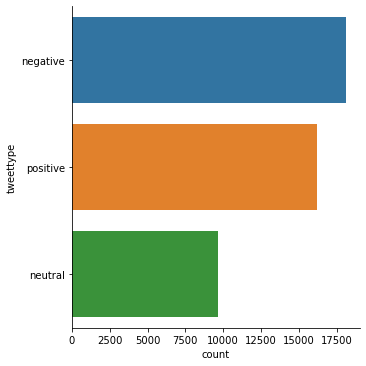

In [9]:
print(tweetData["tweettype"].value_counts())
sb.catplot(y = "tweettype", data = tweetData, kind = "count")

In [11]:
tweetData.to_csv('postprocessed_output.csv')